# **Random Forest with Time Series Split**

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt

In [2]:
# Loading my dataset
df = pd.read_csv('/content/Inani_daily_avg_power.csv')

In [3]:
# Preprocessing: Removing zero values from Avg_Power
df = df[df['Avg_Power'] != 0]

In [4]:

# Features and target variable
features = ['YEAR', 'MO', 'DY', 'Avg_WS50M']
target = 'Avg_Power'

In [5]:
# Ensure 'DY' values are from 1 to 365
df['DY'] = (df['MO'] - 1) * 30 + df['DY']

In [6]:
# Splitting the data into training and test sets
train_df = df[df['YEAR'] <= 2021]  # Training data: 2013-2021
test_df = df[df['YEAR'] == 2022]   # Test data: 2022

In [7]:
# Defining X and y for training and testing
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

In [8]:
# Initializing Random Forest model with max_depth=5
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

In [9]:
# Performing Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)

# Initializing lists to store evaluation metrics
mape_list = []
mae_list = []
mse_list = []
rmse_list = []
r2_list = []

for train_index, test_index in tscv.split(X_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]

    # Training the model
    rf_model.fit(X_train_cv, y_train_cv)

    # Making predictions on the validation set
    predictions = rf_model.predict(X_test_cv)

    # Calculating evaluation metrics
    mape = mean_absolute_percentage_error(y_test_cv, predictions)
    mae = mean_absolute_error(y_test_cv, predictions)
    mse = mean_squared_error(y_test_cv, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_cv, predictions)

    # Appending metrics to lists
    mape_list.append(mape)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Calculating the average of evaluation metrics over all folds
average_mape = np.mean(mape_list)
average_mae = np.mean(mae_list)
average_mse = np.mean(mse_list)
average_rmse = np.mean(rmse_list)
average_r2 = np.mean(r2_list)

print('Validation set scores : ')
print(f"Mean Average Percentage Error (MAPE): {average_mape:.2f}%")
print(f"Mean Absolute Error (MAE): {average_mae:.2f}")
print(f"Mean Squared Error (MSE): {average_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {average_rmse:.2f}")
print(f"Mean R-squared (R2): {average_r2:.2f}")


Validation set scores : 
Mean Average Percentage Error (MAPE): 0.31%
Mean Absolute Error (MAE): 6.87
Mean Squared Error (MSE): 201.59
Root Mean Squared Error (RMSE): 13.51
Mean R-squared (R2): 0.99


In [10]:
# Training the model on the full training set
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [11]:
# Making predictions on the test set
predictions = rf_model.predict(X_test)

In [12]:
# Calculating evaluation metrics on the test set
mape = mean_absolute_percentage_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

In [13]:
print('Test set scores : ')
print(f"MAPE on Test Set: {mape:.2f}%")
print(f"MAE on Test Set: {mae:.2f}")
print(f"MSE on Test Set: {mse:.2f}")
print(f"RMSE on Test Set: {rmse:.2f}")
print(f"R2 on Test Set: {r2:.2f}")

Test set scores : 
MAPE on Test Set: 0.52%
MAE on Test Set: 5.94
MSE on Test Set: 87.26
RMSE on Test Set: 9.34
R2 on Test Set: 0.99


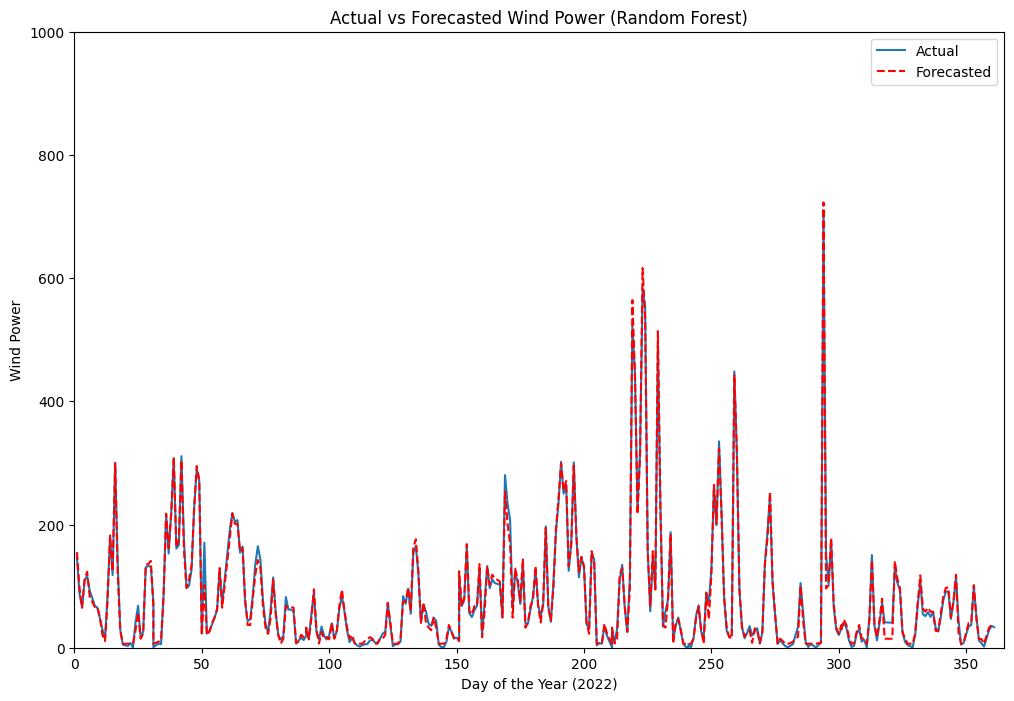

In [14]:
# Ploting the actual and forecast values
plt.figure(figsize=(12, 8))
plt.plot(test_df['DY'], y_test, label='Actual')
plt.plot(test_df['DY'], predictions, label='Forecasted', color='red', linestyle='--')
plt.xlabel('Day of the Year (2022)')
plt.ylabel('Wind Power')
plt.title('Actual vs Forecasted Wind Power (Random Forest)')
plt.legend()
plt.grid(False)

# Seting plot limits to start from 0 on both axes
plt.xlim(0, 365)
plt.ylim(0, 1000)  # Set the y-axis limit to 1000

plt.show()
